## Testing Image Compression Methods

When creating the COCO-peripheral dataset, how should we save mongrels? 

Considerations:
 - This dataset will be large, so any potential savings from image compression will improve usability. 
 - Lossless PNG images are likely overkill in image quality.
 - JPG/JPEG encoding can save space, but may introduce artifacts especially at higher compression rates. 
 - Original COCO images are stored in a lossy JPG format. 
 - Mongrelization may affect encoding scheme because mongrels do not follow typical natural scene statistics.
 
 
Explore this space a bit more to find the optimal.

In [1]:
import os
from os import listdir
from os.path import getsize, isfile, join
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# coco_path = './coco_test/'
# coco_flist =[f for f in listdir(coco_path) if isfile(join(coco_path, f))]
# coco_flist = [join(coco_path,f) for f in coco_flist if '.jpg' in f]
# coco_flist

base_directory = './60_olap_sweep'
eccentricities = [0,50,100,150,200,250,300,450]
image_num_list =  [19,69,979,552,205,139]
image_number = 552

output_folder = './compression_test'

image_name = str(image_number).zfill(12)

#os.system(f'cp ./coco_test/{image_name}.jpg {base_directory}/{image_name}.jpg')

In [9]:
def readin_im_mongrel(image_name, base_directory, showims=False):

    #original image
    original_fname = f'./coco_test/{image_name}.jpg'
    print(original_fname)
    ori_img = cv2.imread(original_fname)
    ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
    
    #eccentricities
    e = 350
    #for e in eccentricities_list[1:]:
    mongrel_fname = f'{base_directory}/{image_name}_X{e}_YNaN_2022-08-12_uniform_60olap_{e}/mongrelized_{image_name}_uniform_60olap_{e}.png'
    mong = cv2.imread(mongrel_fname)
    mong = cv2.cvtColor(mong, cv2.COLOR_BGR2RGB)
    
    return(ori_img, mong)

ori, mong = readin_im_mongrel(image_name, base_directory, showims=True)

./coco_test/000000000552.jpg


In [10]:
#cv2 color conversion
ori_save = cv2.cvtColor(ori,cv2.COLOR_RGB2BGR)
mong_save = cv2.cvtColor(mong,cv2.COLOR_RGB2BGR)

#paths
#original
fname_ori = f'./coco_test/{image_name}.jpg'
#jpg
jpg_fname_ori = os.path.join(output_folder, f'{image_name}_ori.jpg')
jpg_fname_mong = os.path.join(output_folder, f'{image_name}_mong.jpg')
#png
png_fname_ori = os.path.join(output_folder, f'{image_name}_ori.png')
png_fname_mong = os.path.join(output_folder, f'{image_name}_mong.png')

#save
#png
cv2.imwrite(png_fname_ori,ori_save)
cv2.imwrite(png_fname_mong,mong_save)
#jpg_default
cv2.imwrite(jpg_fname_ori,ori_save)
cv2.imwrite(jpg_fname_mong,mong_save)


#check file size
print('Orig coco (jpg code) size:', getsize(fname_ori))

print('Orig png compression size:', getsize(png_fname_ori))
print('Mong png compression size:', getsize(png_fname_mong))

print('Orig jpg compression size:', getsize(jpg_fname_ori))
print('Mong jpg compression size:', getsize(jpg_fname_mong))



Orig coco (jpg code) size: 152003
Orig png compression size: 659219
Mong png compression size: 531536
Orig jpg compression size: 177852
Mong jpg compression size: 125532


Mongrels seem to actually compress slightly better than natural images do in .jpg encoding. This is interesting and somewhat surprising!

## Test Differences between png encoded and jpg

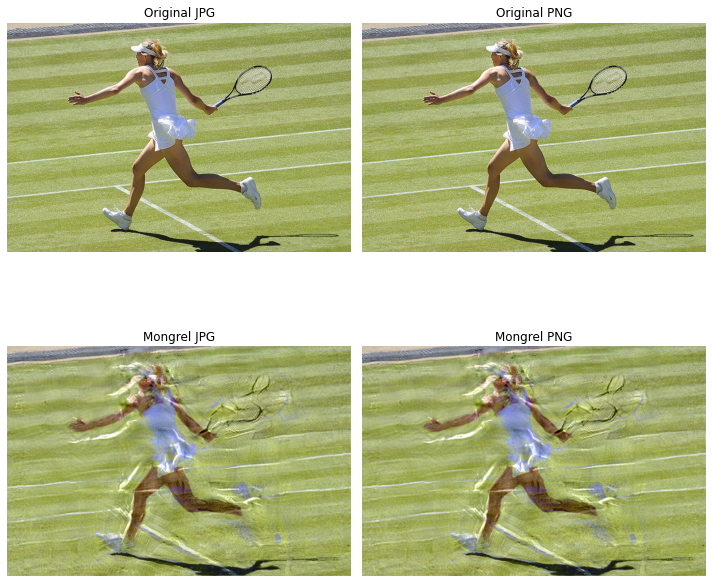

In [11]:
ori_jpg = cv2.cvtColor(cv2.imread(jpg_fname_ori),cv2.COLOR_BGR2RGB)
ori_png = cv2.cvtColor(cv2.imread(png_fname_ori),cv2.COLOR_BGR2RGB)
mong_jpg = cv2.cvtColor(cv2.imread(jpg_fname_mong),cv2.COLOR_BGR2RGB)
mong_png = cv2.cvtColor(cv2.imread(png_fname_mong),cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(ori_jpg)
plt.axis('off')
plt.title('Original JPG')
plt.subplot(2,2,2)
plt.imshow(ori_png)
plt.axis('off')
plt.title('Original PNG')
plt.subplot(2,2,3)
plt.imshow(mong_jpg)
plt.axis('off')
plt.title('Mongrel JPG')
plt.subplot(2,2,4)
plt.imshow(mong_png)
plt.axis('off')
plt.title('Mongrel PNG')
plt.tight_layout()
plt.show()

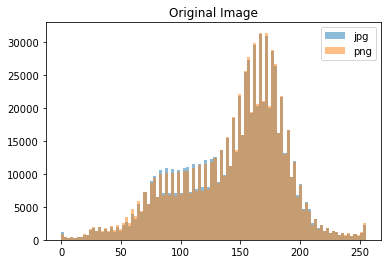

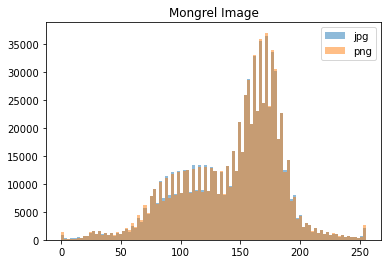

In [12]:
#Histograms

plt.hist(ori_jpg.flatten(),bins=100,label='jpg',alpha=0.5)
plt.hist(ori_png.flatten(),bins=100,label='png',alpha=0.5)
plt.legend()
plt.title('Original Image')
plt.show()

plt.hist(mong_jpg.flatten(),bins=100,label='jpg',alpha=0.5)
plt.hist(mong_png.flatten(),bins=100,label='png',alpha=0.5)
plt.legend()
plt.title('Mongrel Image')
plt.show()

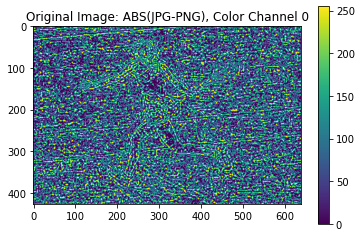

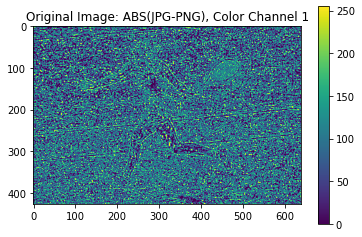

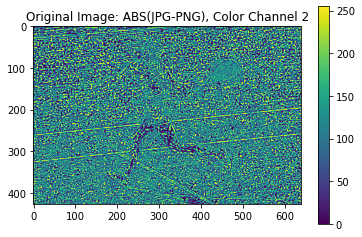

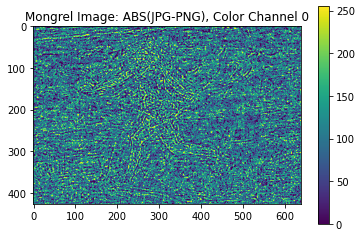

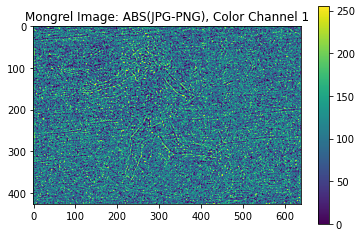

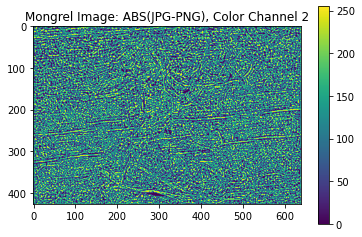

In [13]:
#BELOW DOES NOT SEEM CORRECT. DIFFERENCES ARE TOO BIG!!!

for c in range(3):
    plt.imshow(np.abs(ori_jpg[:,:,c] - ori_png[:,:,c]))
    plt.colorbar()
    plt.title(f'Original Image: ABS(JPG-PNG), Color Channel {c}')
    plt.show()
    
for c in range(3):
    plt.imshow(np.abs(mong_jpg[:,:,c] - mong_png[:,:,c]))
    plt.colorbar()
    plt.title(f'Mongrel Image: ABS(JPG-PNG), Color Channel {c}')
    plt.show()